In [79]:
import pandas as pd
import scipy as sc
import numpy as np
import os
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import colorConverter
import seaborn as sns

%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


Project-level imports.

In [80]:
from constants import guest_types
from constants import colors
from constants import systems
from bootstrap import bootstrap
from bootstrap import dG_bootstrap
from bootstrap import dH_bootstrap
import plotting

# Load in results

## Experimental data from Rekharsky et al.

In [81]:
from constants import experimental_deltaH
from constants import experimental_deltaG

In [82]:
experimental_dH_list = experimental_deltaH.split("\n")
experimental_dH = pd.DataFrame([i.split("\t") for i in experimental_dH_list],
            columns=["System", "Delta H", "Delta H SEM"])

experimmental_dG_list = experimental_deltaG.split("\n")
experimental_dG = pd.DataFrame([i.split("\t") for i in experimmental_dG_list],
            columns=["System", "Delta G", "Delta G SEM"])

experimental = pd.merge(experimental_dH, experimental_dG, on="System")
experimental["Delta H"] = pd.to_numeric(experimental["Delta H"])
experimental["Delta H SEM"] = pd.to_numeric(experimental["Delta H SEM"])

experimental["Delta G"] = pd.to_numeric(experimental["Delta G"])
experimental["Delta G SEM"] = pd.to_numeric(experimental["Delta G SEM"])

## Load in the BGBG-TIP3P and BGBG-TIP3P data

In [5]:
bgbg_tip3p = pd.DataFrame()

for system in systems:

    # BGBG-TIP3P (GAFF v1.7)

    with open(f"results/{system}-bgbg_tip3p-enthalpy-full.json", "r") as f:
        json_data = f.read()
    loaded = json.loads(json_data)  
    
    
    prefix = os.path.join("systems", system, "bgbg-tip3p")
    bgbg_tip3p_attach = np.genfromtxt(os.path.join(prefix, "ti-a.dat"))
    bgbg_tip3p_pull = np.genfromtxt(os.path.join(prefix, "ti-u.dat"))

    if system[0] == "a":
        bgbg_tip3p_release = np.genfromtxt(
            os.path.join("systems", "a-release", "bgbg-tip3p", "ti-r.dat")
        )
    else:
        bgbg_tip3p_release = np.genfromtxt(
            os.path.join("systems", "b-release", "bgbg-tip3p", "ti-r.dat")
        )
    bgbg_tip3p_analytic = 7.14

    delta_g = -1 * (
        bgbg_tip3p_attach[-1, 1]
        + bgbg_tip3p_pull[-1, 1]
        - bgbg_tip3p_release[-1, 1]
        - bgbg_tip3p_analytic
    )
    delta_g_sem = np.sqrt(
        bgbg_tip3p_attach[-1, 2] ** 2
        + bgbg_tip3p_pull[-1, 2] ** 2
        + bgbg_tip3p_release[-1, 2] ** 2
    )    
    
    bgbg_tip3p = bgbg_tip3p.append(pd.DataFrame({'System': system,
                                  'Delta H' : loaded["a00"]["total"][0] - loaded["r00"]["total"][0],
                                  'Delta H SEM' : np.sqrt(loaded["a00"]["total"][1]**2 + loaded["r00"]["total"][1]**2),
                                  "Delta G": delta_g,
                                  "Delta G SEM": delta_g_sem,
                                  "Type": guest_types[system[0:-2]]                                              
                                            }, index=[0]), ignore_index=True)

In [6]:
bgbg_tip3p.head()

,System,Delta H,Delta H SEM,Delta G,Delta G SEM,Type
0,a-bam-p,0.437966,0.628791,-0.016103,0.234765,aliphatic_ammoniums
1,a-bam-s,-1.346366,0.719068,-0.616992,0.270263,aliphatic_ammoniums
2,a-but-p,-0.070088,0.686248,-0.335027,0.312059,aliphatic_carboxylates
3,a-but-s,-1.538708,0.291459,-0.846324,0.255411,aliphatic_carboxylates
4,a-cbu-p,-0.284187,0.312583,-0.264900,0.265886,cyclic_alcohols


In [7]:
bg2bg2_tip3p = pd.DataFrame()

for system in systems:

    # BG2BG2-TIP3P (GAFF v2.1)

    with open(f"results/{system}-bg2bg2_tip3p-enthalpy-full.json", "r") as f:
        json_data = f.read()
    loaded = json.loads(json_data)
    
    prefix = os.path.join("systems", system, "bg2bg2-tip3p")
    bg2bg2_tip3p_attach = np.genfromtxt(os.path.join(prefix, "ti-a.dat"))
    bg2bg2_tip3p_pull = np.genfromtxt(os.path.join(prefix, "ti-u.dat"))

    if system[0] == "a":
        bg2bg2_tip3p_release = np.genfromtxt(
            os.path.join("systems", "a-release", "bg2bg2-tip3p", "ti-r.dat")
        )
    else:
        bg2bg2_tip3p_release = np.genfromtxt(
            os.path.join("systems", "b-release", "bg2bg2-tip3p", "ti-r.dat")
        )
    bg2bg2_tip3p_analytic = 7.14

    delta_g = -1 * (
        bg2bg2_tip3p_attach[-1, 1]
        + bg2bg2_tip3p_pull[-1, 1]
        - bg2bg2_tip3p_release[-1, 1]
        - bg2bg2_tip3p_analytic
    )
    delta_g_sem = np.sqrt(
        bg2bg2_tip3p_attach[-1, 2] ** 2
        + bg2bg2_tip3p_pull[-1, 2] ** 2
        + bg2bg2_tip3p_release[-1, 2] ** 2
    )    
    
    bg2bg2_tip3p = bg2bg2_tip3p.append(pd.DataFrame({'System': system,
                                  'Delta H' : loaded["a00"]["total"][0] - loaded["r00"]["total"][0],
                                  'Delta H SEM' : np.sqrt(loaded["a00"]["total"][1]**2 + loaded["r00"]["total"][1]**2),
                                  "Delta G": delta_g,
                                  "Delta G SEM": delta_g_sem,
                                  "Type": guest_types[system[0:-2]]                                              
                                            }, index=[0]), ignore_index=True)

In [8]:
bg2bg2_tip3p.head()

,System,Delta H,Delta H SEM,Delta G,Delta G SEM,Type
0,a-bam-p,-2.874973,0.304159,0.150013,0.229452,aliphatic_ammoniums
1,a-bam-s,-3.051844,0.385293,-2.930536,0.235066,aliphatic_ammoniums
2,a-but-p,-4.580844,0.386328,-1.369206,0.234800,aliphatic_carboxylates
3,a-but-s,-4.931365,0.440484,-3.103348,0.231945,aliphatic_carboxylates
4,a-cbu-p,-4.469728,0.286022,-2.064314,0.249570,cyclic_alcohols


## Load in SMIRNOFF99Frosst data

In [9]:
from paprika.restraints_json import json_numpy_obj_hook
def load_results(filepath="results.json"):
    with open(os.path.join(filepath), "r") as f:
        json_data = f.read()
    loaded = json.loads(json_data, object_hook=json_numpy_obj_hook)
    return loaded


In [10]:
smirnoff = pd.DataFrame()

for system in systems:
    with open(f"results/{system}-smirnoff-enthalpy-full.json", "r") as f:
        json_data = f.read()
    loaded = json.loads(json_data)
    
    results = load_results(f"results/{system}-results.json")
    results_release = load_results(f"results/{system[0]}-release.json")
    
    smirnoff_attach = results["attach"]["ti-block"]["fe"]
    smirnoff_pull = results["pull"]["ti-block"]["fe"]
    smirnoff_release = results_release["release"]["ti-block"]["fe"]
    
    smirnoff_attach_sem = results["attach"]["ti-block"]["sem"]
    smirnoff_pull_sem = results["pull"]["ti-block"]["sem"]
    smirnoff_release_sem = results_release["release"]["ti-block"]["sem"]
        
    smirnoff_analytic = 7.14

    delta_g = (
        -1 * (smirnoff_attach
        + smirnoff_pull
        - smirnoff_release
        - smirnoff_analytic)
    )
    delta_g_sem = np.sqrt(
        smirnoff_attach_sem ** 2
        + smirnoff_pull_sem ** 2
        + smirnoff_release_sem ** 2
    )

    
    smirnoff = smirnoff.append(pd.DataFrame({'System': system,
                              'Delta H' : loaded["a000"]["total"][0] - loaded["r014"]["total"][0],
                              'Delta H SEM' : np.sqrt(loaded["a000"]["total"][1]**2 + loaded["r014"]["total"][1]**2),
                              "Delta G": delta_g,
                              "Delta G SEM": delta_g_sem,
                              "Type": guest_types[system[0:-2]]                                              
                                        }, index=[0]), ignore_index=True)

# Plot comparisons

In [88]:
def scatter(df, x, y, xerr, yerr, xlabel, ylabel, colors, name):
    fig, ax = plt.subplots(1, figsize=(6 * 1.2, 6))

    for index, typ in enumerate(df["Type"].unique()):
        tmp = df[df["Type"] == typ]        
        ax.errorbar(
            tmp[x],
            tmp[y],
            xerr=tmp[xerr],
            yerr=tmp[yerr],
            fmt="o",
            markersize=8,
            markeredgecolor="k",
            markeredgewidth=0.2,
            elinewidth=1.0,
            ecolor="0.5",            
            color=colors[typ],
        )

        type_statistics = bootstrap(
            x=tmp[x].values,
            x_sem=tmp[xerr].values,
            y=tmp[y].values,
            y_sem=tmp[yerr].values,
            cycles=1000,
        )
        type_string = f"R$^2$ = {type_statistics['mean']['R**2']:0.2f}"
        artist = ax.annotate(
            type_string,
            (0.98, 0.02 + 0.05 * index),
            xytext=(4, -4),
            xycoords="axes fraction",
            textcoords="offset points",
            horizontalalignment="right",
            verticalalignment="bottom",
            size=14,
            color=colors[typ],
            transform=ax.transAxes,
        )

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.plot([-50, 50], [-50, 50], ls="-", c="0.3", zorder=-1, lw="0.5")
    ax.set_ylim(-10, 5)
    ax.set_xlim(-10, 5)

    statistics = bootstrap(
        x=df[x], x_sem=df[xerr], y=df[y], y_sem=df[yerr], cycles=1000
    )

    text = f"RMSE = {statistics['mean']['RMSE']:0.2f} [{statistics['mean']['RMSE']-1.96*statistics['sem']['RMSE']:0.2f}, {statistics['mean']['RMSE']+1.96*statistics['sem']['RMSE']:0.2f}]"
    text += "\n"
    text += f"R$^2$ = {statistics['mean']['R**2']:0.2f} [{statistics['mean']['R**2']-1.96*statistics['sem']['R**2']:0.2f}, {statistics['mean']['R**2']+1.96*statistics['sem']['R**2']:0.2f}]"
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height
    ax.annotate(
        text,
        (0.01, 0.99),
        xytext=(4, -4),
        xycoords="axes fraction",
        textcoords="offset points",
        horizontalalignment="left",
        verticalalignment="top",
        size=14,
        backgroundcolor="white",
        transform=ax.transAxes,
    )
    fig.savefig(f"figures/{name}", bbox_inches="tight")

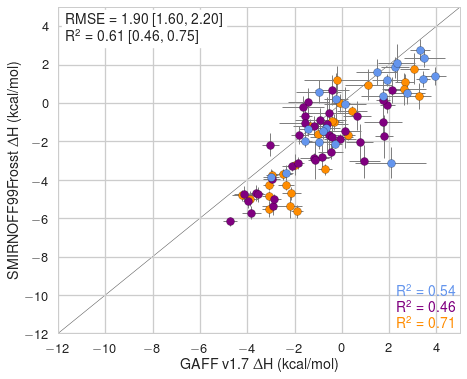

In [12]:
# SMIRNOFF99Frosst vs. GAFF v1.7

df = smirnoff.merge(bgbg_tip3p, on=["System", "Type"], suffixes=("_smirnoff",
                                                                "_bgbg_tip3p"))
assert(len(df) == 86)

artist = scatter(df, 
        x="Delta H_bgbg_tip3p",
        y="Delta H_smirnoff",
        xerr="Delta H SEM_bgbg_tip3p",
        yerr="Delta H SEM_smirnoff",
        xlabel=r"GAFF v1.7 $\Delta$H (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$H (kcal/mol)",
        colors=colors,
        name="SMIRNOFF99Frosst-vs-GAFF-v1.7-dH.pdf")

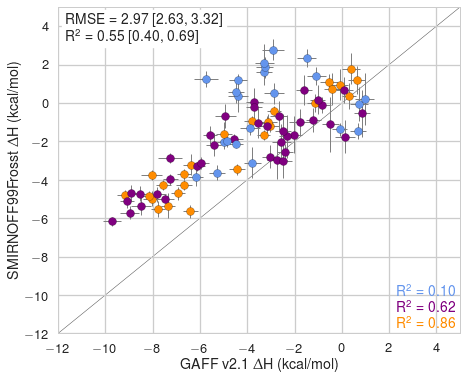

In [13]:
# SMIRNOFF99Frosst vs. GAFF v2.1

df = smirnoff.merge(bg2bg2_tip3p, on=["System", "Type"], suffixes=("_smirnoff",
                                                                "_bg2bg2_tip3p"))
assert(len(df) == 86)

scatter(df, 
        x="Delta H_bg2bg2_tip3p",
        y="Delta H_smirnoff",
        xerr="Delta H SEM_bg2bg2_tip3p",
        yerr="Delta H SEM_smirnoff",
        xlabel=r"GAFF v2.1 $\Delta$H (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$H (kcal/mol)",
        colors=colors,
        name="SMIRNOFF99Frosst-vs-GAFF-v2.1-dH.pdf")

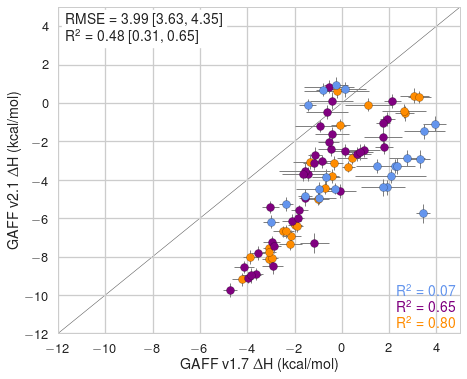

In [14]:
# GAFF v1.7 vs. GAFF v2.1

df = bgbg_tip3p.merge(bg2bg2_tip3p, on=["System", "Type"], suffixes=("_bgbg_tip3p",
                                                                "_bg2bg2_tip3p"))
assert(len(df) == 86)

scatter(df, 
        x="Delta H_bgbg_tip3p",
        y="Delta H_bg2bg2_tip3p",
        xerr="Delta H SEM_bgbg_tip3p",
        yerr="Delta H SEM_bg2bg2_tip3p",
        xlabel=r"GAFF v1.7 $\Delta$H (kcal/mol)",
        ylabel=r"GAFF v2.1 $\Delta$H (kcal/mol)",
        colors=colors,
        name="GAFF-v2.1-vs-GAFF-v1.7-dH.pdf")

In [60]:
def combine_data(df):

    combined = pd.DataFrame()
    df["Short"] = [i[0:-2] for i in df["System"].values]

    for hg in df["Short"].unique():
        tmp = df[df["Short"] == hg]
        for _, row in tmp.iterrows():
            if "p" in row["System"].split("-")[2]:
                primary_dH = row["Delta H"]
                primary_dH_sem = row["Delta H SEM"]
                primary_dG = row["Delta G"]
                primary_dG_sem = row["Delta G SEM"]
            else:
                secondary_dH = row["Delta H"]
                secondary_dH_sem = row["Delta H SEM"]
                secondary_dG = row["Delta G"]
                secondary_dG_sem = row["Delta G SEM"]
                
                
        results = dH_bootstrap(
            primary_dH, primary_dH_sem, secondary_dH, secondary_dH_sem,
            primary_dG, primary_dG_sem, secondary_dG, secondary_dG_sem,
            cycles=100000
        )

        print(f"{hg} P: {primary_dH:+0.4f} ± {primary_dH_sem:+0.2f} S: {secondary_dH:+0.2f} ± {secondary_dH_sem:+0.2f} → Boot: {results['mean']:+0.2f} ± {results['sem']:+0.2f}")
        combined = combined.append(
            {
                "System": hg,
                "Delta H": results["mean"],
                "Delta H SEM": results["sem"],
                "Type": guest_types[hg],
            },
            ignore_index=True,
        )
    return combined


In [61]:
smirnoff_combined = combine_data(smirnoff)

a-bam P: -0.4158 ± +0.28 S: -1.19 ± +0.35 → Boot: -0.43 ± +0.28
a-but P: -1.8585 ± +0.24 S: -0.67 ± +0.64 → Boot: -0.76 ± +0.60
a-cbu P: -2.1144 ± +0.22 S: -2.05 ± +0.32 → Boot: -2.08 ± +0.21
a-chp P: -1.3761 ± +0.33 S: -3.62 ± +0.39 → Boot: -3.42 ± +0.39
a-cpe P: -1.2969 ± +0.35 S: -1.95 ± +0.31 → Boot: -1.93 ± +0.30
a-coc P: -1.4586 ± +0.41 S: -3.87 ± +0.46 → Boot: -3.80 ± +0.45
a-hep P: -4.7057 ± +0.41 S: -4.72 ± +0.40 → Boot: -4.72 ± +0.33
a-ham P: -3.7096 ± +0.29 S: -4.70 ± +0.34 → Boot: -4.02 ± +0.33
a-hp6 P: -5.0855 ± +0.40 S: -4.75 ± +0.39 → Boot: -4.86 ± +0.31
a-hex P: -5.3618 ± +0.45 S: -3.98 ± +0.28 → Boot: -4.32 ± +0.30
a-hx2 P: -4.9946 ± +0.24 S: -3.29 ± +0.24 → Boot: -4.24 ± +0.30
a-hpa P: -4.2650 ± +0.25 S: -5.34 ± +0.66 → Boot: -4.47 ± +0.36
a-mba P: -0.0197 ± +0.47 S: -0.99 ± +0.42 → Boot: -0.95 ± +0.41
a-hx3 P: -3.1135 ± +0.31 S: -2.17 ± +0.61 → Boot: -2.25 ± +0.55
a-mhp P: -4.9829 ± +0.39 S: -4.87 ± +0.26 → Boot: -4.89 ± +0.23
a-mha P: -4.2896 ± +0.26 S: -3.22 ± +0.5

In [62]:
bgbg_combined = combine_data(bgbg_tip3p)

a-bam P: +0.4380 ± +0.63 S: -1.35 ± +0.72 → Boot: -0.84 ± +0.59
a-but P: -0.0701 ± +0.69 S: -1.54 ± +0.29 → Boot: -1.08 ± +0.37
a-cbu P: -0.2842 ± +0.31 S: -0.98 ± +0.73 → Boot: -0.71 ± +0.49
a-chp P: -1.4365 ± +0.36 S: -2.37 ± +0.29 → Boot: -2.33 ± +0.28
a-cpe P: -0.6788 ± +0.60 S: -1.55 ± +0.30 → Boot: -1.06 ± +0.42
a-coc P: -0.7969 ± +0.31 S: -3.00 ± +0.32 → Boot: -2.93 ± +0.32
a-hep P: -3.6344 ± +0.30 S: -4.13 ± +0.42 → Boot: -4.05 ± +0.36
a-ham P: -2.5099 ± +0.40 S: -2.13 ± +0.42 → Boot: -2.33 ± +0.30
a-hp6 P: -3.9724 ± +0.23 S: -3.54 ± +0.30 → Boot: -3.73 ± +0.21
a-hex P: -2.9244 ± +0.45 S: -2.97 ± +0.35 → Boot: -2.95 ± +0.30
a-hx2 P: -2.8510 ± +0.26 S: -2.13 ± +0.41 → Boot: -2.35 ± +0.32
a-hpa P: -3.0882 ± +0.23 S: -2.18 ± +0.49 → Boot: -2.65 ± +0.30
a-mba P: -0.0572 ± +0.40 S: -0.35 ± +0.40 → Boot: -0.32 ± +0.37
a-hx3 P: -1.8584 ± +0.24 S: -3.02 ± +0.37 → Boot: -2.80 ± +0.32
a-mhp P: -3.8714 ± +0.30 S: -3.10 ± +0.27 → Boot: -3.41 ± +0.23
a-mha P: -2.3648 ± +0.35 S: -1.97 ± +0.3

In [63]:
bg2bg2_combined = combine_data(bg2bg2_tip3p)

a-bam P: -2.8750 ± +0.30 S: -3.05 ± +0.39 → Boot: -3.05 ± +0.38
a-but P: -4.5808 ± +0.39 S: -4.93 ± +0.44 → Boot: -4.91 ± +0.42
a-cbu P: -4.4697 ± +0.29 S: -4.97 ± +0.31 → Boot: -4.94 ± +0.29
a-chp P: -0.0928 ± +0.33 S: -5.27 ± +0.35 → Boot: -5.27 ± +0.34
a-cpe P: -3.8764 ± +0.43 S: -4.86 ± +0.29 → Boot: -4.86 ± +0.29
a-coc P: +0.6888 ± +0.33 S: -6.18 ± +0.32 → Boot: -6.17 ± +0.32
a-hep P: -8.9036 ± +0.32 S: -8.55 ± +0.31 → Boot: -8.68 ± +0.24
a-ham P: -6.6948 ± +0.30 S: -6.93 ± +0.31 → Boot: -6.91 ± +0.29
a-hp6 P: -9.1096 ± +0.30 S: -7.83 ± +0.37 → Boot: -8.24 ± +0.31
a-hex P: -8.4867 ± +0.43 S: -7.25 ± +0.33 → Boot: -7.43 ± +0.31
a-hx2 P: -7.4650 ± +0.36 S: -6.13 ± +0.33 → Boot: -6.56 ± +0.30
a-hpa P: -7.5627 ± +0.32 S: -7.35 ± +0.29 → Boot: -7.38 ± +0.26
a-mba P: -1.1453 ± +0.33 S: -3.12 ± +0.36 → Boot: -3.11 ± +0.36
a-hx3 P: -5.9775 ± +0.34 S: -5.43 ± +0.32 → Boot: -5.51 ± +0.28
a-mhp P: -8.0332 ± +0.36 S: -8.14 ± +0.32 → Boot: -8.12 ± +0.28
a-mha P: -6.6763 ± +0.34 S: -6.37 ± +0.3

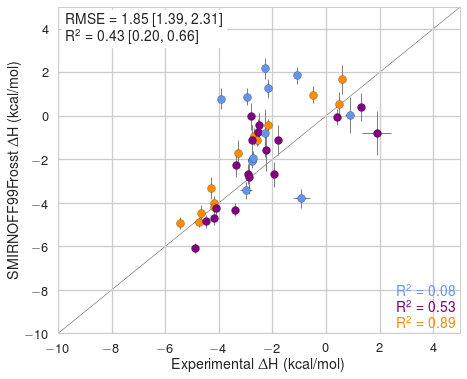

In [89]:
# SMIRNOFF99Frosst vs. Experiment

df = smirnoff_combined.merge(experimental, on=["System"], suffixes=("_smirnoff",
                                                                "_experiment"))
assert(len(df) == 43)

scatter(df, 
        x="Delta H_experiment",
        y="Delta H_smirnoff",
        xerr="Delta H SEM_experiment",
        yerr="Delta H SEM_smirnoff",
        xlabel=r"Experimental $\Delta$H (kcal/mol)",
        ylabel=r"SMIRNOFF99Frosst $\Delta$H (kcal/mol)",
        colors=colors,
        name="SMIRNOFF99Frosst-vs-Experiment-dH.pdf")

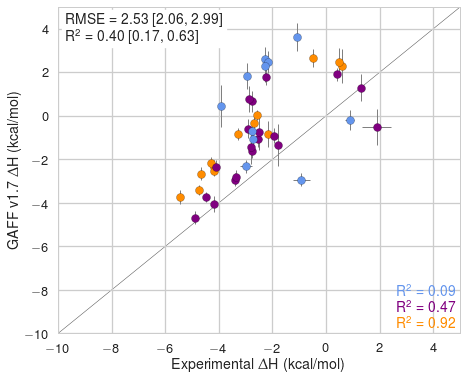

In [90]:
# GAFF v1.7 vs. Experiment

df = bgbg_combined.merge(experimental, on=["System"], suffixes=("_bgbg",
                                                                "_experiment"))
assert(len(df) == 43)

scatter(df, 
        x="Delta H_experiment",
        y="Delta H_bgbg",
        xerr="Delta H SEM_experiment",
        yerr="Delta H SEM_bgbg",
        xlabel=r"Experimental $\Delta$H (kcal/mol)",
        ylabel=r"GAFF v1.7 $\Delta$H (kcal/mol)",
        colors=colors,
        name="GAFF-v1.7-vs-Experiment-dH.pdf")

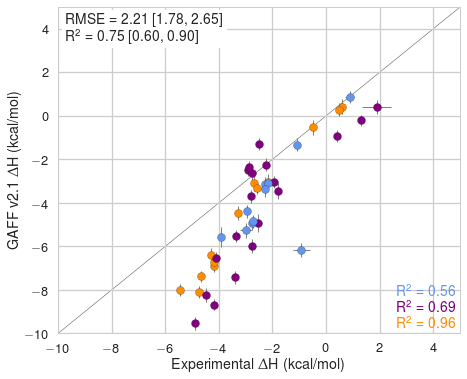

In [91]:
# GAFF v2.1 vs. Experiment

df = bg2bg2_combined.merge(experimental, on=["System"], suffixes=("_bg2bg2",
                                                                "_experiment"))
assert(len(df) == 43)

scatter(df, 
        x="Delta H_experiment",
        y="Delta H_bg2bg2",
        xerr="Delta H SEM_experiment",
        yerr="Delta H SEM_bg2bg2",
        xlabel=r"Experimental $\Delta$H (kcal/mol)",
        ylabel=r"GAFF v2.1 $\Delta$H (kcal/mol)",
        colors=colors,
        name="GAFF-v2.1-vs-Experiment-dH.pdf")

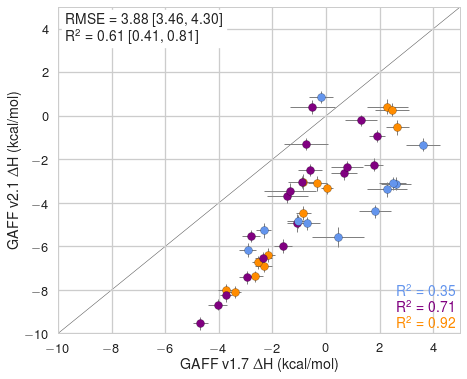

In [92]:
# GAFF v1.7 vs. GAFF v2.1

df = bg2bg2_combined.merge(bgbg_combined, on=["System", "Type"], suffixes=("_bg2bg2",
                                                                "_bgbg"))
assert(len(df) == 43)

scatter(df, 
        x="Delta H_bgbg",
        y="Delta H_bg2bg2",
        xerr="Delta H SEM_bgbg",
        yerr="Delta H SEM_bg2bg2",
        xlabel=r"GAFF v1.7 $\Delta$H (kcal/mol)",
        ylabel=r"GAFF v2.1 $\Delta$H (kcal/mol)",
        colors=colors,
        name="GAFF-v2.1-vs-GAFF-v1.7-combined-dH.pdf")